In [2]:

import sys
import os
sys.path.append(os.path.abspath("/home/raggadruid/Documents/ZephyrRL-Training/"))

from src.training_algorithms.reinforce import REINFORCE
from src.env.sailboat_env import SailboatEnv
from src.utils.plotting import training_reward


import torch
import time
import numpy as np
from datetime import timedelta


pygame 2.6.1 (SDL 2.30.52, Python 3.13.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


Saved model at episode 0
Episode 0: Reward -3.67, Avg (last 10): -3.67
Estimated Remaining: 4 days, 10:10:07
Episode 25: Reward -4.04, Avg (last 10): -0.79
Estimated Remaining: 4:59:54
Episode 50: Reward -4.61, Avg (last 10): -3.51
Estimated Remaining: 3:01:36
Episode 75: Reward -3.61, Avg (last 10): -3.28
Estimated Remaining: 2:24:11
Saved model at episode 100
Episode 100: Reward -3.39, Avg (last 10): -3.86
Estimated Remaining: 2:04:24
Episode 125: Reward -2.75, Avg (last 10): -2.23
Estimated Remaining: 1:50:38
Episode 150: Reward -1.89, Avg (last 10): -3.09
Estimated Remaining: 1:41:37
Episode 175: Reward -2.63, Avg (last 10): -2.11
Estimated Remaining: 1:35:06
Saved model at episode 200
Episode 200: Reward -4.76, Avg (last 10): -2.08
Estimated Remaining: 1:30:06
Episode 225: Reward -3.88, Avg (last 10): -2.68
Estimated Remaining: 1:25:34
Episode 250: Reward -3.80, Avg (last 10): -2.23
Estimated Remaining: 1:22:46
Episode 275: Reward -3.21, Avg (last 10): -1.86
Estimated Remaining: 1

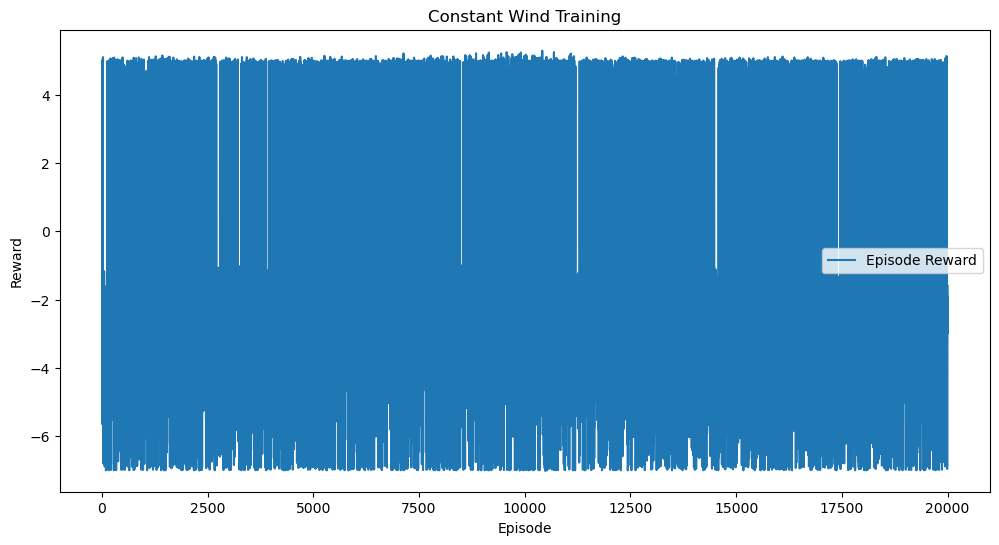

In [3]:
model_path = "/home/raggadruid/Documents/ZephyrRL-Training/src/model_saves/constnat_wind_model_2.pth"



#Parameters
total_episodes = 20000
save_interval = 100 
info_interval = 25
draw_interval = 500



wind_settings = {
    "type": "fixed",
    "wind_speed": 10,  
    "theta_wind": 3*np.pi/4,  
    
}

#env = SailboatEnv(**ENV_PARAMS)
env = SailboatEnv(wind_settings)

obs_space_dims = 8
action_space_dims = 1


agent = REINFORCE(obs_space_dims, action_space_dims)
reward_over_episodes = []

start_time = time.time()  # Start timing

# Training loop
for episode in range(total_episodes):
    episode_start_time = time.time()  
    obs = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action = agent.sample_action(obs)
        obs, reward, done, _ = env.step(action)
        agent.rewards.append(reward)
        episode_reward += reward
        
        if episode % draw_interval == 0:  
            time.sleep(1/60)
            env.draw()
    
    reward_over_episodes.append(episode_reward)
    agent.update()
    
    # Calculate time per episode
    episode_time = time.time() - episode_start_time  
    elapsed_time = time.time() - start_time  

    # Estimate total training time
    estimated_total_time = (elapsed_time / (episode + 1)) * total_episodes
    remaining_time = estimated_total_time - elapsed_time
    
    if episode % save_interval == 0:
        torch.save(agent.net.state_dict(), model_path)
        print(f"Saved model at episode {episode}")
    
    if episode % info_interval == 0:
        avg_reward = np.mean(reward_over_episodes[-10:])
        print(f"Episode {episode}: Reward {episode_reward:.2f}, Avg (last 10): {avg_reward:.2f}")
        print(f"Estimated Remaining: {timedelta(seconds=int(remaining_time))}")
        
        
training_reward(reward_over_episodes, 'Constant Wind Training')